<h1 
  id = "title"; 
  style="color:#4974a5; font-size:250%; text-align:left; border-bottom: 3px solid #4974a5;"
>
  A PROTEIN CLASSIFICATION PREDICTOR
</h1>

<h3 
  id = "title"; 
  style="color:#207d06; font-size:220%; text-align:left; border-bottom: 3px solid #207d06;"
>
  Using Natural Language Processing (NLP) Machine Learning Methods on the Residue Sequences of Proteins.
</h3>

<h2 
  id= "";
  style="color:#8fca6b; border-bottom: 1px solid #207d06;"
>
  Lighthouse Labs, Final-Project:
</h2>

<p 
  id = "by-jamie-dormaar"; 
  style="
    font-family:JetBrains Mono;
    letter-spacing: 1px;
    color:#8fca6b;
    font-size:110%;
    text-align:left;"
>
  By Jamie Dormaar, February 16, 2023.
</p>  

<h2 id= "TOC"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">TABLE OF CONTENTS</h2>


- [DOWNLOAD DATA](#download-data)
- [EXPLORATION](#exploration)
- [DATA CLEANING](#data-cleaning)
    - [EXCLUDE NUCLEIC ACIDS](#exclude-nucleic-acids)
    - [MISSING VALUES](#missing-values)
- [PREPROCESS DATA](#preprocess-data)
- [DATA CLEANING](#revise-data-cleaning)
    - [TARGET VARIABLE REFINEMENT](#target-variable-refinement)
    - [MERGING DATA SOURCES](#merging-data-sources)
        - [CLASSIFICATION OF PROTEIN FAMILIES (P-FAM)](#pfam)
        - [KAGGLE DATASET: STRUCTURAL PROTEIN SEQUENCES (with protein crystallization and xray crystallography specifications)](#xray)
- [SELECTING A TARGET VARIABLE](#select-target-variable)
- [FEATURE ENGINEERING](#feature-engineering)
    - [NLP REPRESENTATIONS](#nlp-representations)
        - [N-GRAMS](#n-grams)
        - [AMINO ACID PHYSICAL PROPERTIES](#aa-physical-properties)
- [MODELING](#modeling)
    - [SPLITTING DATA](#splitting-data)
    - [MODEL TRAINING](#model-training)
    - [MODEL EVALUATION](#model-evaluation)
    - [TUNE HYPERPARAMETERS](#tune-hyperparameters)
- [DEPLOYMENT](#deployment)
- [DISCUSSION](#discussion)
- [REFERENCES](#references)

<!--
Doc Headers:
<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;"></h4>
<h2 id= "download-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DOWNLOAD DATA</h2>
<h2 id= "exploration"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">EXPLORATION</h2>
<h2 id= "data-cleaning"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DATA CLEANING</h2>
<h3 id= "exclude-nucleic-acids"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">EXCLUDE NUCLEIC ACIDS</h3>
<h3 id= "missing-values"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MISSING VALUES</h3>
<h2 id= "preprocess-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">PREPROCESS DATA</h2>
<h3 id= "target-variable-refinement"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">TARGET VARIABLE REFINEMENT</h3>
<h3 id= "merging-data-sources"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MERGING DATA SOURCES</h3>
<h4 id= "pfam"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">CLASSIFICATION OF PROTEIN FAMILIES (P-FAM)</h4>
<h4 id= "xray"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">KAGGLE DATASET: STRUCTURAL PROTEIN SEQUENCES (with protein crystallization and xray crystallography specifications)</h4>
<h3 id= "select-target-variable"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">SELECTING A TARGET VARIABLE</h3>
<h2 id= "feature-engineering"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">FEATURE ENGINEERING</h2>
<h3 id= "nlp-representations"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">NLP REPRESENTATIONS</h3>
<h4 id= "n-grams"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">N-GRAMS</h4>
<h4 id= "aa-physical-properties"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">AMINO ACID PHYSICAL PROPERTIES</h4>
<h2 id= "modeling"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">MODELING</h2>
<h3 id= "splitting-data"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">SPLITTING DATA</h3>
<h3 id= "model-training"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MODEL TRAINING</h3>
<h3 id= "model-evaluation"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MODEL EVALUATION</h3>
<h2 id= "tune-hyperparameters"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">TUNE HYPERPARAMETERS</h2>
<h2 id= "#deployment"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DEPLOYMENT</h2>
<h2 id= "#discussion"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DISCUSSION</h2>
<h2 id= "#references"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">REFERENCES</h2>
-->

<h2 id= "download-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DOWNLOAD DATA</h2>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df_kaggle = pd.read_csv('../data/kaggle_protein_data/pdb_data_seq.csv')
df_kaggle_xray = pd.read_csv('../data/kaggle_protein_data/pdb_data_no_dups.csv')
df_pdb_archive = pd.read_csv('../data/df.csv')
df_pfam_codes = pd.read_csv('../data/df_pfam_codes.csv')

df_k = df_kaggle.copy()
df_xray = df_kaggle_xray.copy()
df_pfam = df_pfam_codes.copy()
df = df_pdb_archive.copy()

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "exploration"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">EXPLORATION</h2>

In [5]:
print(f'df_k shape: {df_k.shape}')
display(df_k.head(2))
print(f'df_xray shape: {df_xray.shape}')
display(df_xray.head(2))
print(f'df_pfam shape: {df_pfam.shape}')
display(df_pfam.head(2))
print(f'df shape: {df.shape}')
display(df.head(2))

df_k shape: (467304, 5)


,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid


df_xray shape: (141401, 14)


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


df_pfam shape: (1042647, 12)


,PdbID,DomainID,AsymChain,EntityID,Pfam_Acc,Pfam_ID,Description,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode
0,101m,1,A,1,PF00042,Globin,Globin,0,Globin,CL0090,MYG_PHYCD,P02185
1,102l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-


df shape: (767333, 5)


,sequence,pdb_id,mol,length,mol_description
0,CCGGCGCCGG,100d_A,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...
1,CCGGCGCCGG,100d_B,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...


In [6]:
df_k.head(10)

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
5,102D,A,CGCAAATTTGCG,24,DNA
6,102D,B,CGCAAATTTGCG,24,DNA
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
9,103D,A,GTGGAATGGAAC,24,DNA


In [7]:
df_xray.head(5)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [8]:
df.head(5)

,sequence,pdb_id,mol,length,mol_description
0,CCGGCGCCGG,100d_A,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...
1,CCGGCGCCGG,100d_B,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...
2,CGCGAATTCGCG,101d_A,na,12,DNA (5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*(CBR)P*GP*C...
3,CGCGAATTCGCG,101d_B,na,12,DNA (5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*(CBR)P*GP*C...
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN


In [9]:
df_id = df['pdb_id'].str.split('_', expand=True)
print(df_id.shape)
df_id.head(10)

(767333, 2)


,0,1
0,100d,A
1,100d,B
2,101d,A
3,101d,B
4,101m,A
5,102d,A
6,102d,B
7,102l,A
8,102m,A
9,103d,A


In [10]:
df['id_pdb'] = df_id[0]
df['subunit'] = df_id[1]
print(df.shape)
df.head()

(767333, 7)


,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
0,CCGGCGCCGG,100d_A,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...,100d,A
1,CCGGCGCCGG,100d_B,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...,100d,B
2,CGCGAATTCGCG,101d_A,na,12,DNA (5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*(CBR)P*GP*C...,101d,A
3,CGCGAATTCGCG,101d_B,na,12,DNA (5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*(CBR)P*GP*C...,101d,B
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "data-cleaning"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DATA CLEANING</h2>

<h3 id= "exclude-nucleic-acids"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">EXCLUDE NUCLEIC ACIDS</h3>

In [11]:
# Exclude the nucleic acids:
print(f'Full pdb dataset:{df.shape}')
df = df[df['mol']=='protein']
print(f'Excluding DNA/RNA:{df.shape}')

df.head(10)

Full pdb dataset:(767333, 7)
Excluding DNA/RNA:(722336, 7)


,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A
7,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A
8,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102m_A,protein,154,MYOGLOBIN,102m,A
11,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A
12,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103m_A,protein,154,MYOGLOBIN,103m,A
15,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A
16,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_B,protein,166,T4 LYSOZYME,104l,B
17,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,104m_A,protein,153,MYOGLOBIN,104m,A
22,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,105m_A,protein,153,MYOGLOBIN,105m,A
27,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,106m_A,protein,154,MYOGLOBIN,106m,A


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 id= "missing-values"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MISSING VALUES</h3>

In [12]:
df.isna().sum()

sequence            0
pdb_id              0
mol                 0
length              0
mol_description    24
id_pdb              0
subunit             0
dtype: int64

In [13]:
df_nan = df[df['mol_description'].isna()]
df_nan

,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
9642,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,1dy3_A,protein,158,NaN,1dy3,A
45416,MLVVPAIDLFRGKVARMIKGRKENTIFYEKDPVELVEKLIEEGFTL...,1qo2_A,protein,241,NaN,1qo2,A
45417,MLVVPAIDLFRGKVARMIKGRKENTIFYEKDPVELVEKLIEEGFTL...,1qo2_B,protein,241,NaN,1qo2,B
124262,ELSENFKKLMKYPYRPCTCTRCIEEQRVSAWFDERFNRSMQPLLTA...,2wnb_A,protein,298,NaN,2wnb,A
336577,MIIPALNLIDGTVVRLHQGDYARQRDYGNDPLPRLQDYAAQGAGVL...,5a5w_A,protein,253,NaN,5a5w,A
336882,ANSVQQQLEALEKSSGGRLGVALINTADNSQILYRADERFAMCSTS...,5a91_A,protein,262,NaN,5a91,A
337299,MIIPALDLIGGTVVRVVRLHQGDYARLRDYGNDPLPRLQDYAAQGA...,5ac6_A,protein,256,NaN,5ac6,A
337300,MIIPALNLIGGTVVRVVRLHQGDYARQRDYGNDPLPRLQDYAAQGA...,5ac7_A,protein,256,NaN,5ac7,A
337301,MIIPALNLIGGTVVRVVRLHQGDYARQRDYGNDPLPRLQDYAAQGA...,5ac7_B,protein,256,NaN,5ac7,B
337302,MIIPALDLIGGTVVRVVRLHQGDYARQRDYGNDPLPRLQDYAAQGA...,5ac8_A,protein,256,NaN,5ac8,A


In [14]:
prot_ids = list(df_nan['id_pdb'].unique())
prot_ids

['1dy3',
 '1qo2',
 '2wnb',
 '5a5w',
 '5a91',
 '5ac6',
 '5ac7',
 '5ac8',
 '5ahe',
 '5ahf',
 '5fjo',
 '5g1t',
 '5g1y',
 '5g2h',
 '5g2i',
 '5g2w',
 '5g3r',
 '5g4e',
 '5g5i']

>NOTE: I found the following classification labels by manually entering the protein id into the pdb search bar.  This was feasable only because there were only 20 missing labels, but figuring out how to use the pdb api for this would be idea in future applications.

In [15]:
missing_lables = {
      '1dy3': 'PYROPHOSPHORYLASE'
    , '1qo2': 'ISOMERASE'
    , '2wnb': 'TRANSFERASE'
    , '5a5w': 'ISOMERASE'
    , '5a91': 'HYDROLASE'
    , '5ac6': 'ISOMERASE'
    , '5ac7': 'ISOMERASE'
    , '5ac8': 'ISOMERASE'
    , '5ahe': 'ISOMERASE'
    , '5ahf': 'ISOMERASE'
    , '5fjo': 'LYASE'
    , '5g1t': 'ISOMERASE'
    , '5g1y': 'ISOMERASE'
    , '5g2h': 'ISOMERASE'
    , '5g2i': 'ISOMERASE'
    , '5g2w': 'ISOMERASE'
    , '5g3r': 'HYDROLASE'
    , '5g4e': 'ISOMERASE'
    , '5g5i': 'ISOMERASE'
}

In [16]:
df['mol_description'] = df['mol_description'].fillna(df['id_pdb'].map(missing_lables))
df.isna().sum()

sequence           0
pdb_id             0
mol                0
length             0
mol_description    0
id_pdb             0
subunit            0
dtype: int64

In [17]:
df['mol_description'].nunique()

81534

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "preprocess-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">PREPROCESS DATA</h2>

<h3 id= "target-variable-refinement"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">TARGET VARIABLE REFINEMENT</h3>

In [18]:
df.head()

,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A
7,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A
8,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102m_A,protein,154,MYOGLOBIN,102m,A
11,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A
12,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103m_A,protein,154,MYOGLOBIN,103m,A


In [19]:
df_pfam.head()

,PdbID,DomainID,AsymChain,EntityID,Pfam_Acc,Pfam_ID,Description,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode
0,101m,1,A,1,PF00042,Globin,Globin,0,Globin,CL0090,MYG_PHYCD,P02185
1,102l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
2,103l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
3,104l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
4,104l,2,B,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-


In [20]:
df_pfam.AsymChain.nunique()
df_pfam.AsymChain.value_counts().head(20)

df_pfam['pdb_id'] = df_pfam['PdbID'] + '_' + df_pfam['AsymChain']

In [21]:
df_pfam.nunique()

PdbID          186544
DomainID         2712
AsymChain        1633
EntityID          113
Pfam_Acc        10889
Pfam_ID         10889
Description     11517
IsWeak              2
Clan_ID           615
Clan_Acc          615
UniprotID       57838
UniprotCode     57515
pdb_id         655421
dtype: int64

In [22]:
df_pfam.pdb_id.head(10)

0    101m_A
1    102l_A
2    103l_A
3    104l_A
4    104l_B
5    104m_A
6    105m_A
7    107l_A
8    108l_A
9    109l_A
Name: pdb_id, dtype: object

In [23]:
print(df_pfam.shape)
df_pfam.head()

(1042647, 13)


,PdbID,DomainID,AsymChain,EntityID,Pfam_Acc,Pfam_ID,Description,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode,pdb_id
0,101m,1,A,1,PF00042,Globin,Globin,0,Globin,CL0090,MYG_PHYCD,P02185,101m_A
1,102l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-,102l_A
2,103l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-,103l_A
3,104l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-,104l_A
4,104l,2,B,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-,104l_B


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 id= "merging-data-sources"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MERGING DATA SOURCES</h3>

<h4 id= "pfam"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">CLASSIFICATION OF PROTEIN FAMILIES (P-FAM)</h4>

In [24]:
df_class = df_pfam[['pdb_id', 'Pfam_ID', 'Description', 'Clan_ID']].copy()
df_class['id_pdb'] = df_pfam['PdbID']

df_class['id_pdb'] = df_class['id_pdb'].str.lower()
df['id_pdb'] = df['id_pdb'].str.lower()

df_pfam_left = df.merge(df_class, how='left', on='id_pdb')
print(f'df_pfam_left.shape: {df_pfam_left.shape}')
      
df_pfam_right = df.merge(df_class, how='right', on='id_pdb')
print(f'df_pfam_right.shape: {df_pfam_right.shape}')
      
df_pfam_inner = df.merge(df_class, how='inner', on='id_pdb')
print(f'df_pfam_inner.shape: {df_pfam_inner.shape}')
      
df_pfam_outer = df.merge(df_class, how='outer', on='id_pdb')
print(f'df_pfam_outer.shape: {df_pfam_outer.shape}')
print(f'df.shape: {df.shape}')
print(f'df_pfam.shape: {df_pfam.shape}')


df_pfam_left.shape: (31634152, 11)
df_pfam_right.shape: (31591931, 11)
df_pfam_inner.shape: (31591874, 11)
df_pfam_outer.shape: (31634209, 11)
df.shape: (722336, 7)
df_pfam.shape: (1042647, 13)


In [25]:
df_class = df_pfam[['pdb_id', 'Pfam_ID', 'Description', 'Clan_ID']].copy()
df_class['id_pdb'] = df_pfam['PdbID']

df_pfam_left = df.merge(df_class, how='left', on='id_pdb')
print(f'df_pfam_left.shape: {df_pfam_left.shape}')
      
df_pfam_inner = df.merge(df_class, how='inner', on='id_pdb')
print(f'df_pfam_inner.shape: {df_pfam_inner.shape}')
      
df_pfam_outer = df.merge(df_class, how='outer', on='id_pdb')
print(f'df_pfam_outer.shape: {df_pfam_outer.shape}')
print(f'df.shape: {df.shape}')
print(f'df_pfam.shape: {df_pfam.shape}')

# df.head()

df_pfam_left.shape: (31634152, 11)
df_pfam_inner.shape: (31591874, 11)
df_pfam_outer.shape: (31634209, 11)
df.shape: (722336, 7)
df_pfam.shape: (1042647, 13)


In [26]:
# Keeping the inner merge df:
df = df_pfam_inner.copy()

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h4 id= "xray"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">KAGGLE DATASET: STRUCTURAL PROTEIN SEQUENCES (with protein crystallization and xray crystallography specifications)</h4>

In [27]:
df_xray = df_kaggle_xray.copy()
df_xray.head(2)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


In [28]:
# Drop data relevent to xray crystallography:
df_xray.drop(columns=[
    'resolution',
    'crystallizationMethod',
    'crystallizationTempK',
    'densityMatthews',
    'experimentalTechnique',
    'densityPercentSol',
    'pdbxDetails',
    'phValue',
    'publicationYear'], inplace=True)

In [29]:
df_xray.head(5)

,structureId,classification,macromoleculeType,residueCount,structureMolecularWeight
0,100D,DNA-RNA HYBRID,DNA/RNA Hybrid,20,6360.30
1,101D,DNA,DNA,24,7939.35
2,101M,OXYGEN TRANSPORT,Protein,154,18112.80
3,102D,DNA,DNA,24,7637.17
4,102L,HYDROLASE(O-GLYCOSYL),Protein,165,18926.61


In [30]:
df_xray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   macromoleculeType         137636 non-null  object 
 3   residueCount              141401 non-null  int64  
 4   structureMolecularWeight  141401 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ MB


In [31]:
# Drop the nucleic acids again and the column once made redundant:
df_xray = df_xray[df_xray['macromoleculeType']=='Protein']
df_xray.drop(columns=['macromoleculeType'], inplace=True)

# Convert molecular weight to kDa from Da:
df_xray['structureMolecularWeight'] = round(df_xray['structureMolecularWeight']*0.001, 2)

# Rename columns:
df_xray.rename(
    columns=({
          'structureId': 'id_pdb'
        ,	'classification': 'class'
        ,	'residueCount': 'length'
        ,	'structureMolecularWeight': 'kDa'
    }), inplace=True
)

# Prep ids for merge:
df_xray['id_pdb'] = df_xray['id_pdb'].str.lower()
df_xray.head()

,id_pdb,class,length,kDa
2,101m,OXYGEN TRANSPORT,154,18.11
4,102l,HYDROLASE(O-GLYCOSYL),165,18.93
5,102m,OXYGEN TRANSPORT,154,18.01
7,103l,HYDROLASE(O-GLYCOSYL),167,19.09
8,103m,OXYGEN TRANSPORT,154,18.09


In [32]:
df_xray['id_pdb'] = df_xray['id_pdb'].str.lower()
df['id_pdb'] = df['id_pdb'].str.lower()

id_df_inner = df.merge(df_xray, how='inner', on='id_pdb')
print(f'id_df_inner.shape: {id_df_inner.shape}')

id_df_outer = df.merge(df_xray, how='outer', on='id_pdb')
print(f'id_df_outer.shape: {id_df_outer.shape}')

id_df_left = df.merge(df_xray, how='left', on='id_pdb')
print(f'id_df_left.shape: {id_df_left.shape}')

id_df_right = df.merge(df_xray, how='right', on='id_pdb')
print(f'id_df_right.shape: {id_df_right.shape}')


# df.head()

id_df_inner.shape: (11424367, 14)
id_df_outer.shape: (31606231, 14)
id_df_left.shape: (31602339, 14)
id_df_right.shape: (11428259, 14)


In [33]:
# Once again keeping the inner:
df = id_df_inner.copy()
display(df.head())
df.isna().sum()

,sequence,pdb_id_x,mol,length_x,mol_description,id_pdb,subunit,pdb_id_y,Pfam_ID,Description,Clan_ID,class,length_y,kDa
0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A,101m_A,Globin,Globin,Globin,OXYGEN TRANSPORT,154,18.11
1,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A,102l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),165,18.93
2,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A,103l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),167,19.09
3,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
4,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54


sequence               0
pdb_id_x               0
mol                    0
length_x               0
mol_description        0
id_pdb                 0
subunit                0
pdb_id_y           20410
Pfam_ID                0
Description            0
Clan_ID                0
class                  1
length_y               0
kDa                    0
dtype: int64

In [34]:
subs_mix = df[df['pdb_id_x']!=df['pdb_id_y']].shape
subs_mix

(10969945, 14)

In [35]:
df.shape[0]-subs_mix[0]

454422

In [36]:
df[df['pdb_id_x']!=df['pdb_id_y']].head()

,sequence,pdb_id_x,mol,length_x,mol_description,id_pdb,subunit,pdb_id_y,Pfam_ID,Description,Clan_ID,class,length_y,kDa
4,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
5,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_B,protein,166,T4 LYSOZYME,104l,B,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
13,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10gs_A,protein,209,GLUTATHIONE S-TRANSFERASE P1-1,10gs,A,10gs_B,GST_N,"Glutathione S-transferase, N-terminal domain",Thioredoxin,TRANSFERASE/TRANSFERASE INHIBITOR,418,47.83
15,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10gs_A,protein,209,GLUTATHIONE S-TRANSFERASE P1-1,10gs,A,10gs_B,GST_C_3,"Glutathione S-transferase, C-terminal domain",GST_C,TRANSFERASE/TRANSFERASE INHIBITOR,418,47.83
16,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10gs_B,protein,209,GLUTATHIONE S-TRANSFERASE P1-1,10gs,B,10gs_A,GST_N,"Glutathione S-transferase, N-terminal domain",Thioredoxin,TRANSFERASE/TRANSFERASE INHIBITOR,418,47.83


In [37]:
df_subs = df[df['pdb_id_x']==df['pdb_id_y']]

# Trial setting this sub-set as df temp variable:
df = df_subs.copy()

In [38]:
df.head()

,sequence,pdb_id_x,mol,length_x,mol_description,id_pdb,subunit,pdb_id_y,Pfam_ID,Description,Clan_ID,class,length_y,kDa
0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A,101m_A,Globin,Globin,Globin,OXYGEN TRANSPORT,154,18.11
1,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A,102l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),165,18.93
2,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A,103l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),167,19.09
3,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
6,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_B,protein,166,T4 LYSOZYME,104l,B,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54


In [39]:
# Rearrange columns:
df = df[[   
      'id_pdb'
    , 'subunit'
    , 'mol_description'
    , 'Description'
    , 'Pfam_ID'
    , 'Clan_ID'
    , 'class'
    , 'kDa'
    , 'sequence'
]].copy()

df['len'] = df['sequence'].str.len()

In [40]:
df.head()

,id_pdb,subunit,mol_description,Description,Pfam_ID,Clan_ID,class,kDa,sequence,len
0,101m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
1,102l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165
2,103l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167
3,104l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166
6,104l,B,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166


In [ ]:
df.rename(columns=({
      'mol_description': 'molec'
    , 'Description': 'description'
    , 'Pfam_ID': 'pfam_id'
    , 'Clan_ID': 'clan_id'
}), inplace=True)

In [183]:
df.to_csv('../data/merged_data.csv', index=False)
df.shape

(454422, 10)

In [184]:
df.isna().sum()

id_pdb         0
subunit        0
molec          0
description    0
pfam_id        0
clan_id        0
class          1
kDa            0
sequence       0
len            0
dtype: int64

In [185]:
df.dropna(inplace=True)

In [186]:
df.nunique()

id_pdb         119735
subunit           183
molec           46093
description      9710
pfam_id          9397
clan_id           601
class            4256
kDa             24777
sequence        79399
len              1300
dtype: int64

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "revise-data-cleaning"; style="color:#4974a5; text-align:left; padding: 0px; border-bottom: 3px solid #4974a5;">REVISED DATA CLEANING</h2>

<h3 id= "select-target-variable"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">SELECTING A TARGET VARIABLE</h3>

In [182]:
df = pd.read_csv('../data/merged_data.csv')

df.shape

(454422, 10)

In [189]:
# Look at pfam_id type class_freq = cf
cf_pfam = df['pfam_id'].value_counts()
cf_clan = df['clan_id'].value_counts()
cf_desc = df['description'].value_counts()
cf_mole = df['molec'].value_counts()
cf_clas = df['class'].value_counts()

In [190]:
display(cf_pfam.head())
display(cf_clan.head())
display(cf_desc.head())
display(cf_mole.head())
display(cf_clas.head())

C1-set        9334
Proteasome    8240
V-set         7551
Pkinase       4763
WD40          4406
Name: pfam_id, dtype: int64

-                103872
Ig                19478
NADP_Rossmann     16832
NTN               12885
P-loop_NTPase     11854
Name: clan_id, dtype: int64

 Immunoglobulin C1-set domain    9334
 Proteasome subunit              8131
 Immunoglobulin V-set domain     7551
 Protein kinase domain           4751
 WD domain, G-beta repeat        4406
Name: description, dtype: int64

Uncharacterized protein             1611
Beta-2-microglobulin                1219
Bromodomain-containing protein 1    1215
Ryanodine receptor 1                1158
Glutamate receptor 2                 931
Name: molec, dtype: int64

HYDROLASE         62517
TRANSFERASE       52705
OXIDOREDUCTASE    49809
IMMUNE SYSTEM     20151
LYASE             14607
Name: class, dtype: int64


pfam_id:
--------------------
Number of labels: 38
pfam_id shape: (89568, 10)



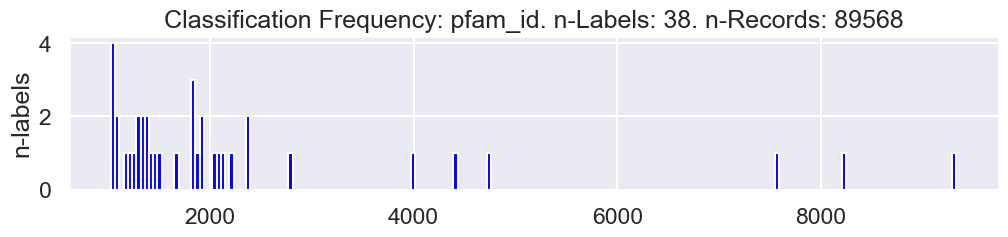


clan_id:
--------------------
Number of labels: 84
clan_id shape: (350650, 10)



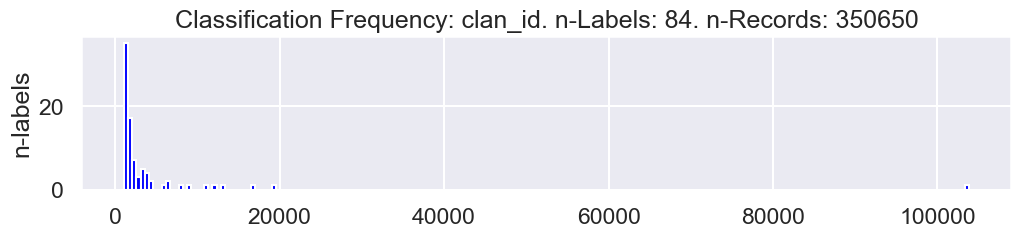


description:
--------------------
Number of labels: 43
description shape: (96502, 10)



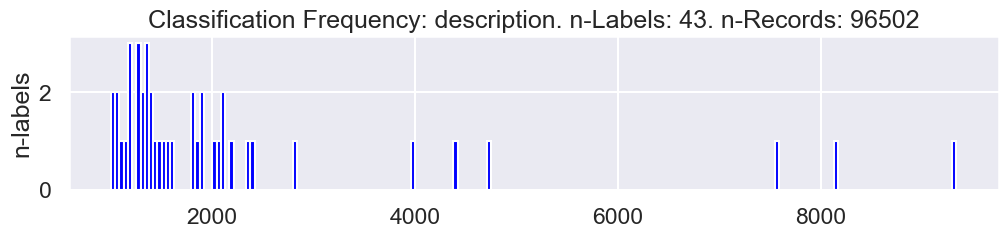


molec:
--------------------
Number of labels: 4
molec shape: (5203, 10)



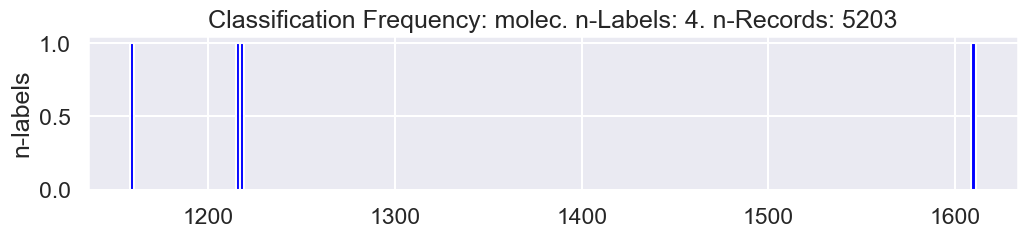


class:
--------------------
Number of labels: 48
class shape: (376030, 10)



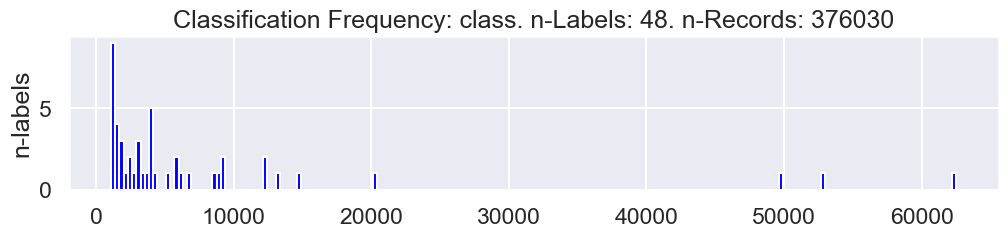

In [223]:
x_list = [cf_pfam, cf_clan, cf_desc , cf_mole, cf_clas]
x_labels = ['pfam_id', 'clan_id', 'description' , 'molec', 'class']

cntr = 0
for y_type in x_labels:
    test_df = df.drop_duplicates(subset=[y_type, 'sequence'])

    # Reduce dimensionality by dropping low populated labels
    y_array = np.asarray(x_list[cntr][(x_list[cntr] > 1000)].index)

    Y = df[df[y_type].isin(y_array)]
    print(f'\n{y_type}:\n--------------------\nNumber of labels: {len(y_array)}')
    print(f'{y_type} shape: {Y.shape}\n')
    # print(y_array)

    x = Y[y_type].value_counts()
    plt.figure(figsize=(12,2))
    plt.hist(x, bins=200, color = 'blue')
    plt.title(f'Classification Frequency: {y_type}. n-Labels: {len(y_array)}. n-Records: {len(Y)}')
    plt.ylabel('n-labels')
    plt.savefig(f'../images/{y_type}_target_variable_assessment.png')
    plt.show()
    cntr += 1

Edit this cell to view the full lists of each y-target labels:

Most obvious issue with the possible classifications sub-sets, concerns the '-' label in clan_id which accounts for approximately 28% of its data points collection.
<!--
38
['C1-set',
'Proteasome',
'V-set',
'Pkinase',
'WD40',
'Proteasome_A_N'
'adh_short_C2',
'Globin',
'Ferritin',
'Arm',
'PK_Tyr_Ser-Thr',
'Bromodomain'
'Hemagglutinin',
'Cpn60_TCP1',
'Hormone_recep',
'Trypsin',
'EF-hand_7'
'Neur_chan_LBD',
'LRR_8',
'Lig_chan',
'GFP',
'p450',
'Hexapep',
'Ank_2'
'Insulin',
'Aldedh',
'MHC_I',
'RVP',
'ubiquitin',
'PNP_UDP_1',
'MR_MLE_C',
'Ras'
'Lys',
'peroxidase',
'Asp',
'MR_MLE_N',
'GST_N',
'NO_synthase']
pfam_id shape as target: (89568, 10)


84
['-',
'Ig',
'NADP_Rossmann',
'NTN',
'P-loop_NTPase',
'TPR',
'Beta_propeller'
'PKinase',
'E-set',
'TIM_barrel',
'HTH',
'Glyco_hydro_tim',
'EF_hand'
'Thioredoxin',
'Concanavalin',
'Cupin',
'AB_hydrolase',
'PBP',
'LRR'
'Ubiquitin',
'Ferritin',
'Peptidase_PA',
'Globin',
'PLP_aminotran'
'Ion_channel',
'Thiolase',
'Nucleoplasmin',
'Peptidase_AA',
'CU_oxidase'
'Actin_ATPase',
'Lysozyme',
'MHC',
'Ank',
'EGF',
'GBD',
'ClpP_crotonase',
'HUP'
'OB',
'Beta-lactamase',
'Peptidase_MA',
'Trefoil',
'HEXAPEP',
'GHD'
'Acetyltrans',
'Peptidase_CA',
'Amidohydrolase',
'6_Hairpin',
'Peptidase_MH'
'HAD',
'GFP',
'Transthyretin',
'Peroxidase',
'GST_C',
'THDP-binding'
'Enolase_TIM',
'Insulin',
'ALDH-like',
'AAA_lid',
'GT-A',
'PUP'
'Gal_mutarotase',
'SH3',
'GT-B',
'HotDog',
'GADPH_aa-bio_dh',
'Enolase_N'
'C_Lectin',
'PH',
'PDZ-like',
'RNase_H',
'Hybrid',
'RdRP',
'Tudor'
'Phosphatase',
'Calycin',
'His_Kinase_A',
'NTF2',
'HD_PDEase',
'Cytochrome-c'
'Viral_Gag',
'Periplas_BP',
'Sialidase',
'DNA_clamp',
'GroES']
clan_id shape as target: (350650, 10)

43
description shape as target: (96502, 10)

{'num_labels': 48
'labels_list':[
    'HYDROLASE',
    'TRANSFERASE',
    'OXIDOREDUCTASE',
    'IMMUNE SYSTEM',
    'LYASE'
    'HYDROLASE/HYDROLASE INHIBITOR',
    'TRANSCRIPTION',
    'TRANSPORT PROTEIN'
    'VIRAL PROTEIN',
    'SIGNALING PROTEIN',
    'LIGASE',
    'ISOMERASE'
    'MEMBRANE PROTEIN',
    'PROTEIN BINDING',
    'CHAPERONE',
    'STRUCTURAL PROTEIN'
    'CELL ADHESION',
    'TRANSFERASE/TRANSFERASE INHIBITOR',
    'DNA BINDING PROTEIN'
    'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
    'SUGAR BINDING PROTEIN'
    'PROTEIN TRANSPORT',
    'METAL BINDING PROTEIN',
    'CELL CYCLE'
    'UNKNOWN FUNCTION',
    'TOXIN',
    'VIRUS',
    'ELECTRON TRANSPORT'
    'RNA BINDING PROTEIN',
    'GENE REGULATION',
    'APOPTOSIS',
    'DE NOVO PROTEIN'
    'TRANSPORT PROTEIN/ISOMERASE',
    'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR'
    'TRANSLATION',
    'METAL TRANSPORT',
    'HORMONE',
    'MOTOR PROTEIN'
    'CONTRACTILE PROTEIN',
    'BIOSYNTHETIC PROTEIN',
    'PHOTOSYNTHESIS'
    'FLUORESCENT PROTEIN',
    'OXYGEN TRANSPORT',
    'PROTEIN FIBRIL'
    'VIRAL PROTEIN/IMMUNE SYSTEM',
    'TRANSCRIPTION REGULATOR'
    'transferase/transferase inhibitor'
    'structural genomics, unknown function'
]
'class shape as target': (376030, 10)}
-->

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

In [221]:
# Removing '-' from labels:
df_clan_id = df[df['clan_id']!='-']
df_clan_id = df.drop_duplicates(subset=['clan_id', 'sequence'])
val_cnt = df_clan_id['clan_id'].value_counts()

y_array = np.asarray(val_cnt[(val_cnt > 1000)].index)
Y = df_clan_id[df_clan_id['clan_id'].isin(y_array)]

df_clan_id.shape

(99119, 10)


clan_id:
--------------------
Number of labels: 12
clan_id shape: (44188, 10)



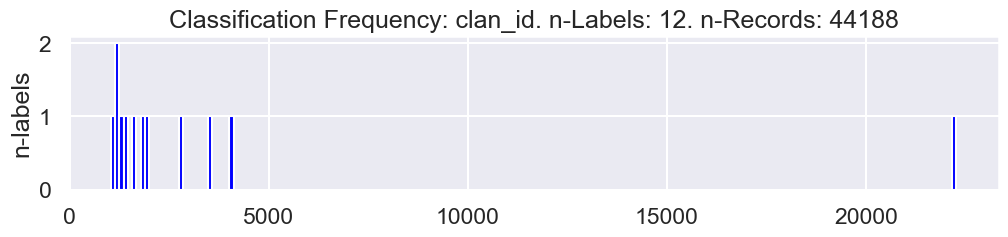

In [222]:
x = Y['clan_id'].value_counts()

print(f'\nclan_id:\n--------------------\nNumber of labels: {len(y_array)}')
print(f'clan_id shape: {Y.shape}\n')

plt.figure(figsize=(12,2))
plt.hist(x, bins=200, color = 'blue')
# plt.title(f'Classification Frequency: clan_id. n-Labels: 83. n-Records: {len(Y)}')
plt.title(f'Classification Frequency: clan_id. n-Labels: {len(y_array)}. n-Records: {len(Y)}')
plt.ylabel('n-labels')
plt.show()

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

In [227]:
df.drop(columns=['clan_id', 'molec', 'id_pdb', 'subunit'], inplace=True)
df.head()

,description,pfam_id,class,kDa,sequence,len
0,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
1,Phage lysozyme,Phage_lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165
2,Phage lysozyme,Phage_lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167
3,Phage lysozyme,Phage_lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166
4,Phage lysozyme,Phage_lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166


In [ ]:
df.to_csv('../d')

<h2 id= "feature-engineering"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">FEATURE ENGINEERING</h2>

<h3 id= "nlp-representations"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">NLP REPRESENTATIONS</h3>

<h4 id= "n-grams"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">N-GRAMS</h4>

In [113]:
# https://stackoverflow.com/questions/18658106/quick-implementation-of-aaacter-n-grams-using-python
def aa_grams(seq, n = 3, jump_size = 2):
    return [seq[i:i + n] for i in range(0, len(seq) - n + 1, jump_size)]

In [114]:
df.sequence.head(3)

0    MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1    MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2    MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
Name: sequence, dtype: object

In [115]:
df.head(3).sequence.apply(aa_grams)

0    [MVL, LSE, EGE, EWQ, QLV, VLH, HVW, WAK, KVE, ...
1    [MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ...
2    [MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ...
Name: sequence, dtype: object

In [116]:
df["3_aa"] = df.sequence.apply(aa_grams)
df.head()

,id_pdb,subunit,molec,description,pfam_id,clan_id,class,kDa,sequence,len,3_aa
0,101m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,"[MVL, LSE, EGE, EWQ, QLV, VLH, HVW, WAK, KVE, ..."
1,102l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ..."
2,103l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ..."
3,104l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ..."
7,104m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.03,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,153,"[VLS, SEG, GEW, WQL, LVL, LHV, VWA, AKV, VEA, ..."


In [117]:
df.to_csv("../data/model_df_3aa_grams.csv.gz", index=False, compression="gzip")

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h4 id= "count_vectorization_aa_seq"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">COUNT VECTORIZAITON OF AMINO ACID RESIDUES</h4>

In [118]:
from collections import Counter

In [119]:
def count_vectorization_aa_seq(sequence):
    """
    A function that generates a count vector for each character of the input string:
      1. Get the count of each aa in the protein sequence
      2. Sort the unique aa residues
      3. Create a vector with the frequency of each aa recurrence 

    Args:
        sequence (_str_): _string format of protein sequence_

    Returns:
        vector (_list_:) residue recurrence frequency count vector
    """
    aa_count = Counter(sequence)
    unique_aa = sorted(aa_count.keys())
    vector = [aa_count[residue] for residue in unique_aa]
    return vector

In [120]:

seq_test = df['sequence'].loc[0]
seq_test

'MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG'

In [ ]:
import nlp_data_prep as nlp

unique_aa, vector = nlp.count_vectorization_aa_seq(seq_test)
print(unique_aa)
print(vector)

In [136]:
vector = count_vectorization_aa_seq(seq_test)
print(vector)

[17, 6, 14, 5, 11, 12, 9, 19, 18, 3, 2, 4, 5, 4, 6, 5, 9, 2, 3]


In [137]:
df['aa_freq'] = df['sequence'].apply(count_vectorization_aa_seq)
df.head(3)

,id_pdb,subunit,molec,description,pfam_id,clan_id,class,kDa,sequence,len,3_aa,aa_freq
0,101m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,"[MVL, LSE, EGE, EWQ, QLV, VLH, HVW, WAK, KVE, ...","[17, 6, 14, 5, 11, 12, 9, 19, 18, 3, 2, 4, 5, ..."
1,102l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ...","[17, 10, 8, 5, 11, 1, 10, 13, 16, 5, 12, 3, 5,..."
2,103l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ...","[16, 11, 8, 5, 11, 1, 10, 13, 17, 5, 12, 3, 5,..."


In [138]:
df['aa_freq'].loc[1]

[17, 10, 8, 5, 11, 1, 10, 13, 16, 5, 12, 3, 5, 13, 6, 12, 9, 3, 6]

In [139]:
df.to_csv("../data/model_df_n-grams_countvect.csv.gz", index=False, compression="gzip")

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h4 id= "aa-physical-properties"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">AMINO ACID PHYSICAL PROPERTIES</h4>

[table of amino acid physical properties](https://www.thermofisher.com/ca/en/home/life-science/protein-biology/protein-biology-learning-center/protein-biology-resource-library/pierce-protein-methods/amino-acid-physical-properties.html)

In [163]:
df_aa_props = pd.read_csv('../research/aa_properties.csv', sep=',', engine='python')
df_aa_props

,common_name,abbreviation,symbol,molar_mass,distinctive_feature
0,glycine,gly,G,75,the only amino acid lacking a chiral carbon
1,alanine,ala,A,89,—
2,valine,val,V,117,a branched-chain amino acid
3,leucine,leu,L,131,a branched-chain amino acid
4,isoleucine,ile,I,131,an essential amino acid because most animals c...
5,phenylalanine,phe,F,165,also classified as an aromatic amino acid
6,tryptophan,trp,W,204,also classified as an aromatic amino acid
7,methionine,met,M,149,side chain functions as a methyl group donor
8,proline,pro,P,115,contains a secondary amine group; referred to ...
9,serine,ser,S,105,found at the active site of many enzymes


In [168]:
df_aa = pd.read_csv('../research/aa_phys_properties.csv', sep=',', engine='python')
df_aa

,amino_acid,code,hydropathy,charge,pKa_NH2,pKa_COOH,pK(R),pI,solubility
0,Arginine,R,-4.5,1,9.09,2.18,13.2,10.76,71.8
1,Asparagine,N,-3.5,0,8.80,2.02,,5.41,2.4
2,Aspartate,D,-3.5,-1,9.60,1.88,3.65,2.77,0.42
3,Glutamate,E,-3.5,-1,9.67,2.19,4.25,3.22,0.72
4,Glutamine,Q,-3.5,0,9.13,2.17,,5.65,2.6
5,Lysine,K,-3.9,1,10.28,8.90,2.2,9.74,NaN
6,Serine,S,-0.8,0,9.15,2.21,,5.68,36.2
7,Threonine,T,-0.7,0,9.12,2.15,,5.87,freely
8,Cysteine,C,2.5,0,10.78,1.71,8.33,5.07,freely
9,Histidine,H,-3.2,1,8.97,1.78,6,7.59,4.19


In [169]:
# Hydropathy index
keys = df_aa['code']
values =  df_aa['hydropathy']
hydropathy_dict = dict(zip(keys, values))
hydropathy_dict

{'R': -4.5,
 'N': -3.5,
 'D': -3.5,
 'E': -3.5,
 'Q': -3.5,
 'K': -3.9,
 'S': -0.8,
 'T': -0.7,
 'C': 2.5,
 'H': -3.2,
 'M': 1.9,
 'A': 1.8,
 'V': 4.2,
 'G': -0.4,
 'I': 4.5,
 'L': 3.8,
 'F': 2.8,
 'P': 1.6,
 'W': -0.9,
 'Y': -1.3}

In [170]:
# Net charge
keys = df_aa['code']
values =  df_aa['charge']
net_charge_dict = dict(zip(keys, values))
net_charge_dict

{'R': 1,
 'N': 0,
 'D': -1,
 'E': -1,
 'Q': 0,
 'K': 1,
 'S': 0,
 'T': 0,
 'C': 0,
 'H': 1,
 'M': 0,
 'A': 0,
 'V': 0,
 'G': 0,
 'I': 0,
 'L': 0,
 'F': 0,
 'P': 0,
 'W': 0,
 'Y': 0}

In [171]:
# Protein acidity pI
keys = df_aa['code']
values =  df_aa['pI']
acidity_dict = dict(zip(keys, values))
acidity_dict

{'R': 10.76,
 'N': 5.41,
 'D': 2.77,
 'E': 3.22,
 'Q': 5.65,
 'K': 9.74,
 'S': 5.68,
 'T': 5.87,
 'C': 5.07,
 'H': 7.59,
 'M': 5.74,
 'A': 6.01,
 'V': 5.97,
 'G': 5.97,
 'I': 6.02,
 'L': 5.98,
 'F': 5.48,
 'P': 6.48,
 'W': 5.89,
 'Y': 5.66}

<h2 id= "modeling"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">MODELING</h2>

<h3 id= "splitting-data"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">SPLITTING DATA</h3>

In [224]:
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,id_pdb,subunit,molec,description,pfam_id,clan_id,class,kDa,sequence,len
0,101m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
1,102l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165
2,103l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167
3,104l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166
4,104l,B,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166


In [225]:
from sklearn.model_selection import train_test_split

clean_text = df['3_aa']
labels = df['pfam_id']

X_train, X_test, y_train, y_test = train_test_split(
                                          clean_text
                                        , labels
                                        , test_size = 0.2
                                        , random_state = 17
                                        , shuffle=True
                                    )
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

KeyError: '3_aa'

In [594]:
# 3). ----- Train Test Split -----

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    data['sequence'], data['clan_id'], test_size = 0.1, random_state = 137)

# Create a Count Vectorizer to gather the unique elements in sequence
cv = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
cv.fit(X_train)
X_train_df = cv.transform(X_train)
X_test_df = cv.transform(X_test)

#Print a few of the features
print(cv.get_feature_names_out()[-20:])

['zigi' 'ziwz' 'zkal' 'zkky' 'zknt' 'zkyh' 'zlik' 'zlzk' 'zpsz' 'zpvm'
 'zrgd' 'zrvi' 'zssk' 'ztvl' 'ztzk' 'zvbd' 'zvib' 'zvka' 'zwdl' 'zzvb']


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 id= "model-training"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MODEL TRAINING</h3>

### 4). Machine Learning Models

Initially I will try to fit a Naive Bayes model as other researchers have done for these types of vectorized features. Adaboost will be used as well for comparison.

In [595]:
# 4). ------ Machine Learning Models ------

# Make a prediction dictionary to store accuracies
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_df, y_train)

NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)

print( prediction['MultinomialNB'])

0.6645420534848275


In [596]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train_df, y_train)

ada_pred = model.predict(X_test_df)
prediction["Adaboost"] = accuracy_score(ada_pred, y_test)

print(prediction["Adaboost"])

0.3515311071082167


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 id= "model-evaluation"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MODEL EVALUATION</h3>

<AxesSubplot: >

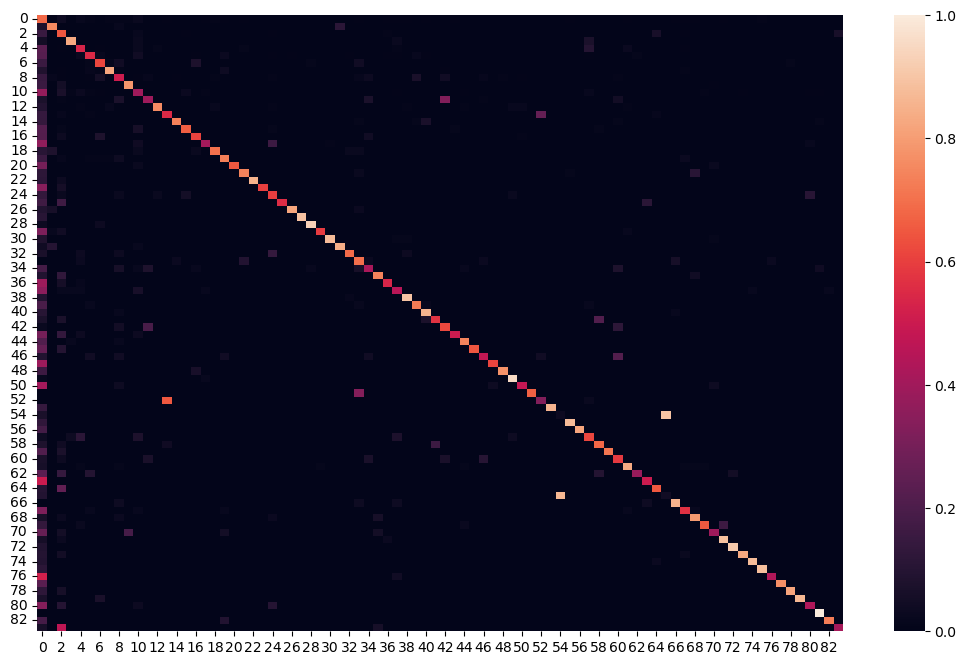

In [598]:
# 5). ----- Plot Confusion Matrix for NB -----

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = label)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

In [607]:
print(label[54])
print(label[65])

Enolase_TIM
Enolase_N


In [605]:
print(classification_report(y_test, NB_pred, target_names = label))

                 precision    recall  f1-score   support

              -       0.66      0.69      0.67      2261
             Ig       0.46      0.48      0.47        23
  NADP_Rossmann       0.27      0.62      0.37        26
            NTN       0.78      0.61      0.68        87
  P-loop_NTPase       0.88      0.82      0.85        17
            TPR       0.56      0.50      0.53        30
 Beta_propeller       0.79      0.59      0.68        44
        PKinase       0.77      0.65      0.70        31
          E-set       0.80      0.69      0.74        29
     TIM_barrel       0.81      0.89      0.85        57
            HTH       0.53      0.62      0.57        65
Glyco_hydro_tim       0.84      0.93      0.89        29
        EF_hand       0.64      0.85      0.73        27
    Thioredoxin       0.94      0.88      0.91        33
   Concanavalin       0.63      0.74      0.68        23
          Cupin       0.87      0.74      0.80        72
   AB_hydrolase       0.80    

In [606]:
# #Print F1 score metrics
# f1_metrics = pd.DataFrame(classification_report(y_test, NB_pred, target_names = label))
# f1_metrics.head()

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "tune-hyperparameters"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">TUNE HYPERPARAMETERS</h2>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "#deployment"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DEPLOYMENT</h2>

## PLANS FOR IMPROVEMENT:

- amino acid residue feature engineering:
    - counting the frequencies of each aa residue per protein
- using those frequencies to account for potentially numerically consistent biological trends such as the overal pka (partial acidic measures of the free COO and NH2 residue ends and possible the side chains of the more hydrophilic and electrostatically charged side chain residues.  
- That in addition to the overall hydrophobicity measures I expect should likely help classify proteins on a broad but highly specific level with respect to the proteins biological function: 
        - structural , 
        - intrinsically disordered, 
        - globular, and 
        - transmembranous proteins.
- closer look at the protein classification names for example, the labels 'Enolase_TIM' and 'Enolase_N' are often mis-labeled as each other, so they should become the same label.
- NLP method of vectorization could be poked a a bit, this was run with 3_aa sequences only.
- There is an additional dataset I think could prove useful if incorporated here, which classifies sub-sections of protein sequences based on well known structural motifs and functional protein sub domains. 
    - for example dna-clamps, or structural ternary motifs such as particular folding patterns
        - beta-barrels, beta-sheets, hair-pins, etc.

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "#discussion"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DISCUSSION</h2>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 id= "#references"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">REFERENCES</h2>

1. https://www.ebi.ac.uk/interpro/entry/InterPro/#table
1. https://www.kaggle.com/datasets/shahir/protein-data-set
1. https://stackoverflow.com/questions/18658106/quick-implementation-of-aaacter-n-grams-using-python
1. [table of amino acid physical properties](https://www.thermofisher.com/ca/en/home/life-science/protein-biology/protein-biology-learning-center/protein-biology-resource-library/pierce-protein-methods/amino-acid-physical-properties.html)
1. p. 73 David L. Nelson, Michael M. Cox. (2008), Amino acids, Peptides, and Proteins. _Lehninger Principles of Biochemistry._ Chapter 3, 5th Ed.
1. Chidyausiku, T.M., Mendes, S.R., Klima, J.C. et al. De novo design of immunoglobulin-like domains. Nat Commun 13, 5661 (2022). https://doi.org/10.1038/s41467-022-33004-6
